In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Primary storage info
account_name = 'calcuttaadlsgen2' # fill in your primary account name
container_name = 'yelp' # fill in your container name
relative_path_raw_json = 'raw_json' # fill in your relative folder path

adls_path_raw_json = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_raw_json)
print('Primary storage account path: ' + adls_path_raw_json)

relative_path_staging_csv = 'staging_csv' # fill in your relative folder path

adls_path_staging_csv = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_staging_csv)
print('Staging csv storage account path: ' + adls_path_staging_csv)

relative_path_staging_parquet = 'staging_parquet' # fill in your relative folder path

adls_path_staging_parquet = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_staging_parquet)
print('Staging parquet storage account path: ' + adls_path_staging_parquet)

relative_path_curated_csv = 'curated_csv' # fill in your relative folder path

adls_path_curated_csv = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_curated_csv)
print('Curated csv storage account path: ' + adls_path_curated_csv)

relative_path_curated_parquet = 'curated_parquet' # fill in your relative folder path

adls_path_curated_parquet = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path_curated_parquet)
print('Curated parquet storage account path: ' + adls_path_curated_parquet)

StatementMeta(sparkpool, 38, 4, Finished, Available)

Primary storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/raw_json
Staging csv storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/staging_csv
Staging parquet storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/staging_parquet
Curated csv storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/curated_csv
Curated parquet storage account path: abfss://yelp@calcuttaadlsgen2.dfs.core.windows.net/curated_parquet

In [1]:
%%configure -f
{
    "conf":{
        "spark.driver.maxResultSize":"6g"
    }
}

StatementMeta(sparkpool, 38, 3, Finished, Available)

In [17]:
#Read the business data
business_csv_staging_path = adls_path_staging_csv + '/yelp_businesss_csv'
df_staging_business_csv = spark.read.format("csv") \
    .option("header", True) \
    .load(business_csv_staging_path)
print ("__________________Raw Schema__________________")
df_staging_business_csv.printSchema()
print ("__________________Raw Count__________________\n")
print(df_staging_business_csv.count())
print("\n")
print ("__________________Raw Sample__________________\n")
df_staging_business_csv.show(5, truncate = False)

StatementMeta(sparkpool, 33, 18, Finished, Available)

__________________Raw Schema__________________
root
 |-- address: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- city: string (nullable = true)
 |-- is_open: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- name: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- state: string (nullable = true)

__________________Raw Count__________________

209393


__________________Raw Sample__________________

+-------------------------+----------------------+--------------------------------------------------------------------------+---------------+-------+----------+------------+------------------------+-----------+------------+-----+-----+
|address                  |business_id           |categories                                                                |city 

In [7]:
#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#misc
import gc
import time
import warnings

#settings
#start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")

StatementMeta(sparkpool, 33, 8, Submitted, Available)

In [18]:
#Convert to pandas df-> not rerunable
#pd_staging_business_csv = df_staging_business_csv.toPandas()

StatementMeta(sparkpool, 33, 19, Finished, Available)

StatementMeta(sparkpool, 33, 42, Finished, Available)

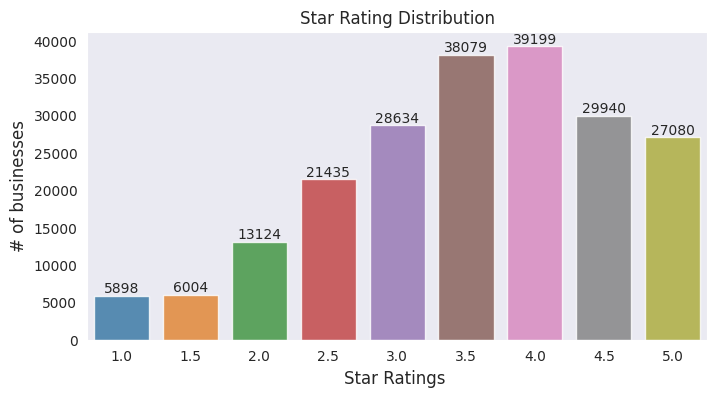

In [41]:
#Get the distribution of the ratings
x=pd_staging_business_csv['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

StatementMeta(sparkpool, 33, 43, Finished, Available)

There are  1336  different types/categories of Businesses in Yelp!


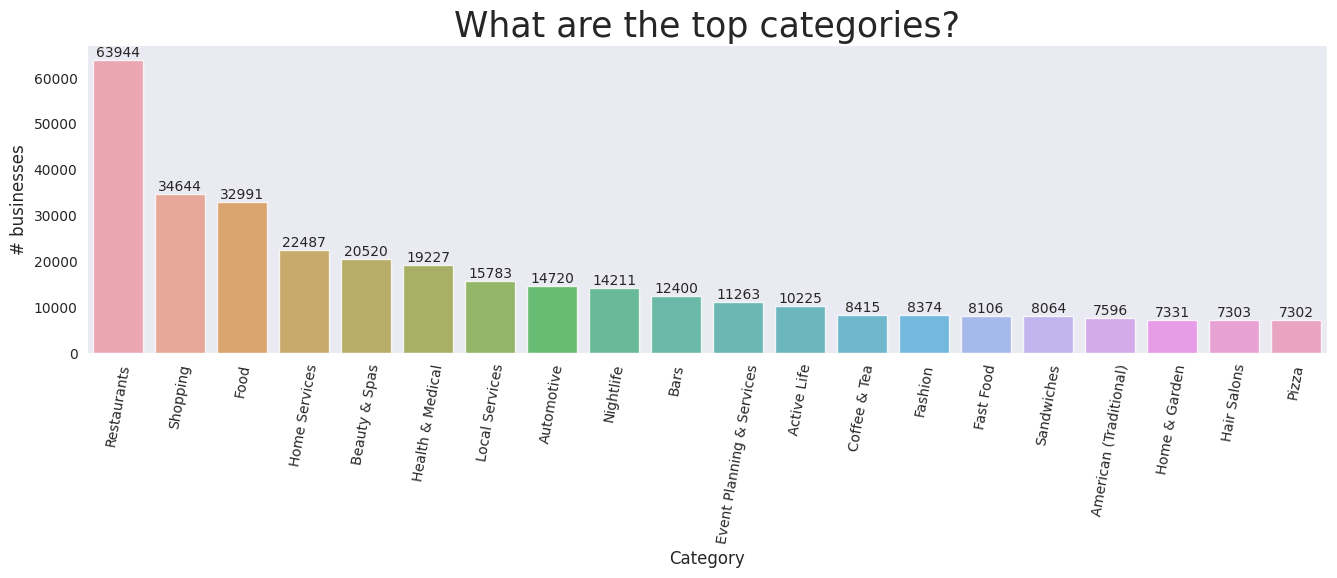

In [42]:
# Top 20 most popular business categories?
from pyspark.sql.functions import *
from pyspark.sql.types import *
cats=df_staging_business_csv.select(explode(split(col("categories"), ",\s*")).alias("category")).toPandas()
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

StatementMeta(sparkpool, 33, 41, Finished, Available)

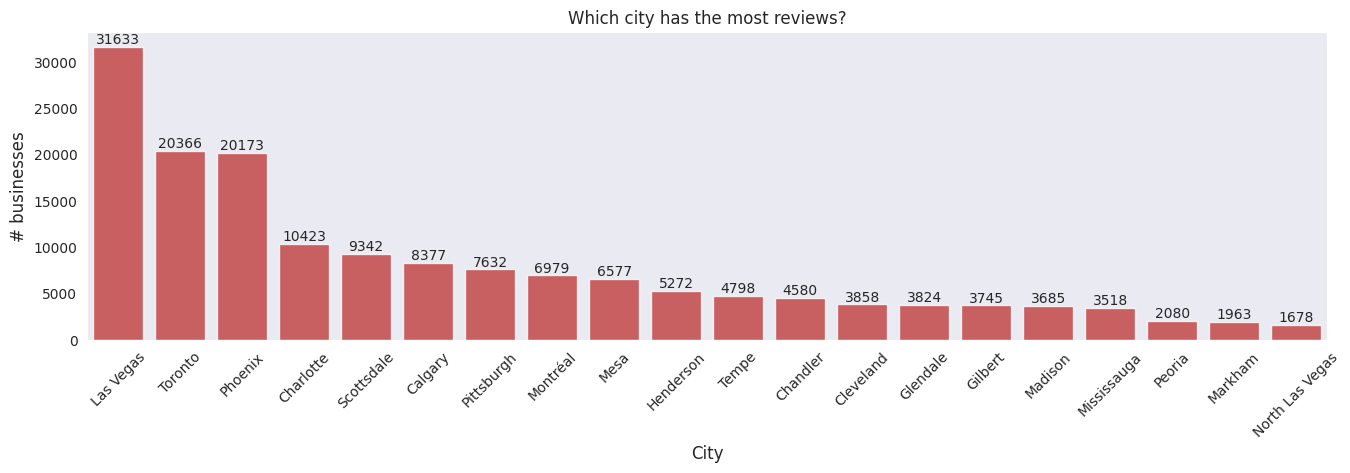

In [40]:
#Here, lets first check which cities have the most businesses reviewed by Yelp.

#Get the distribution of the ratings
x=pd_staging_business_csv['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()